In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('Cleaned-Data.csv')

In [30]:
df.shape

(173, 36)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float64
 2   Height_ft                   173 non-null    float64
 3   Marital_Status              173 non-null    object 
 4   PCOS                        172 non-null    float64
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

In [33]:
df.isnull().sum()

Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                          1
Family_History_PCOS           0
Menstrual_Irregularity        0
Hormonal_Imbalance            0
Hyperandrogenism              0
Hirsutism                     0
Mental_Health                 0
Conception_Difficulty         0
Insulin_Resistance            0
Diabetes                      0
Childhood_Trauma              0
Cardiovascular_Disease        0
Diet_Bread_Cereals            0
Diet_Milk_Products            0
Diet_Fruits                   0
Diet_Vegetables               0
Diet_Starchy_Vegetables       0
Diet_NonStarchy_Vegetables    0
Diet_Fats                     0
Diet_Sweets                   0
Diet_Fried_Food               0
Diet_Tea_Coffee               0
Diet_Multivitamin             0
Vegetarian                    0
Exercise_Frequency            0
Exercise_Type                 0
Exercise_Duration             0
Sleep_Ho

In [32]:
df.describe()

,Weight_kg,Height_ft,PCOS,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin
count,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,56.549711,160.636647,0.220930,5.445087,3.647399,3.034682,3.439306,3.069364,2.450867,4.531792,3.618497,3.179191,4.549133,1.393064
std,12.025369,7.287373,0.416085,2.116832,2.548930,2.048527,1.769596,1.857054,1.709808,2.293919,2.255253,2.019448,2.785795,2.326880
min,36.000000,124.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,157.480000,0.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,55.000000,160.020000,0.000000,7.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,6.000000,0.000000
75%,64.000000,165.100000,0.000000,7.000000,7.000000,4.000000,5.000000,4.000000,3.000000,7.000000,6.000000,5.000000,7.000000,2.000000
max,115.000000,182.880000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [67]:
replace_map = {
    "Yes": 1,
    "No": 0,
    "Diagnosed by doctor": 1,
    "Not diagnosed by doctor": 0,
    "yes": 1,
    "no": 0
}

# Clean these 3 features
for col in ['Hormonal_Imbalance', 'Insulin_Resistance', 'Stress_Level']:
    df[col] = df[col].replace(replace_map)

C:\Users\adity\AppData\Local\Temp\ipykernel_18744\22082335.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



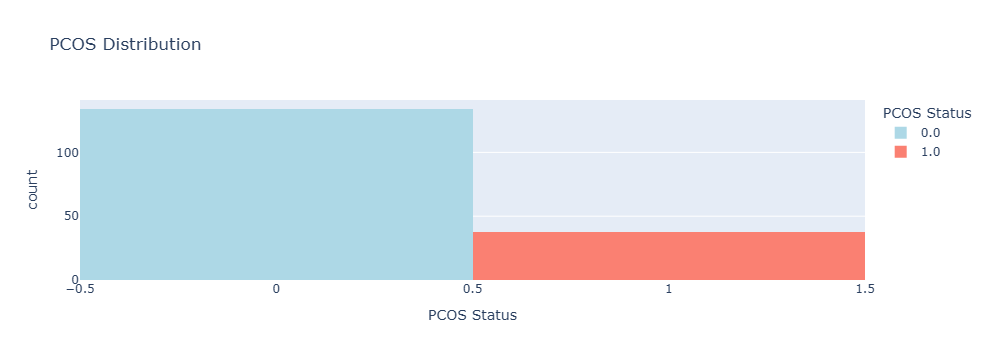

In [68]:
# Count are total count of peoples, 0 indicates negative and 1 indicates positive.
fig = px.histogram(df, x='PCOS', color='PCOS',
                   title="PCOS Distribution",
                   labels={'PCOS': 'PCOS Status'},
                   color_discrete_sequence=['lightblue', 'salmon'])
fig.show()

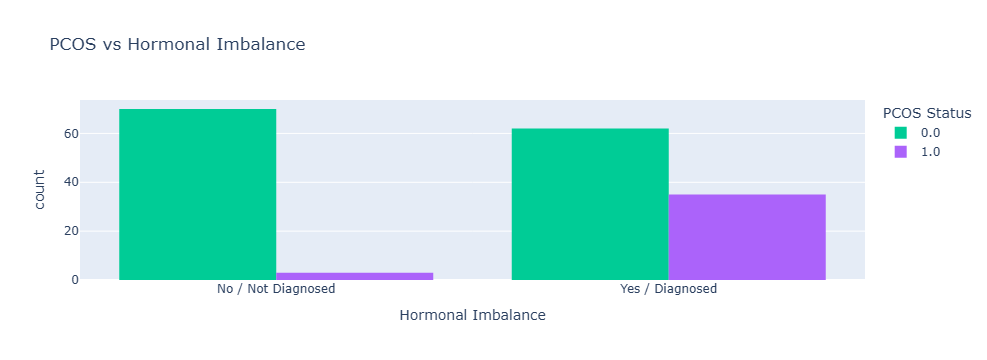

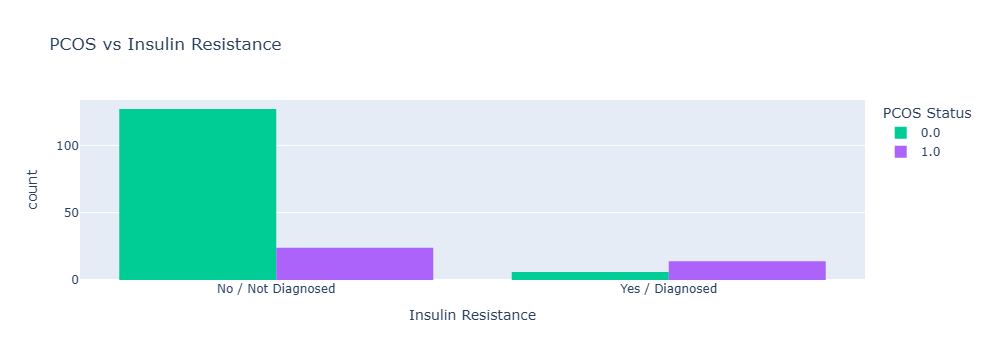

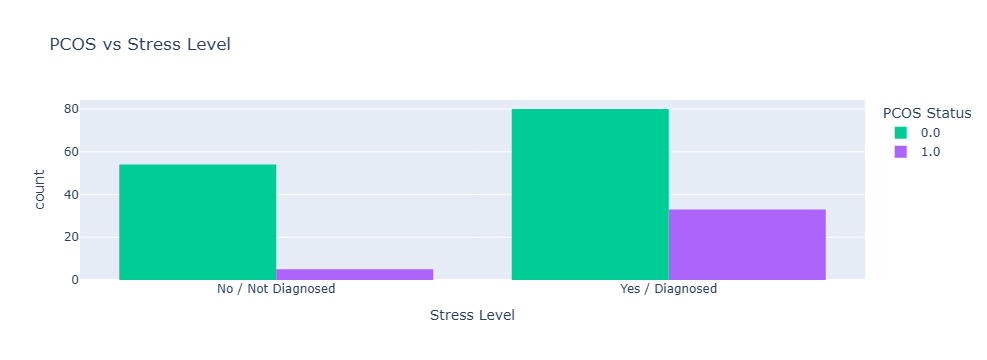

In [69]:
features = ['Hormonal_Imbalance', 'Insulin_Resistance', 'Stress_Level']

for feature in features:
    fig = px.histogram(df, x=feature, color='PCOS',
                       barmode='group',
                       title=f"PCOS vs {feature.replace('_', ' ')}",
                       labels={feature: feature.replace('_', ' '), 'PCOS': 'PCOS Status'},
                       color_discrete_map={'Yes': 'lightgreen', 'No': 'lightcoral'})
    fig.update_xaxes(tickvals=[0, 1], ticktext=['No / Not Diagnosed', 'Yes / Diagnosed'])
    fig.show()

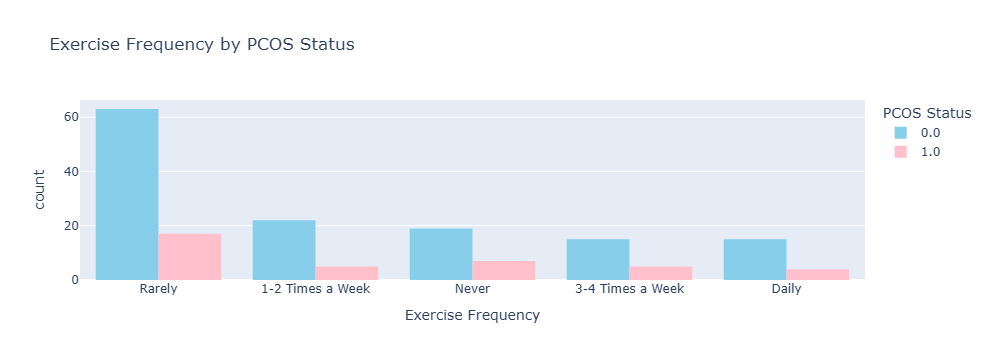

In [70]:
fig = px.histogram(df, x='Exercise_Frequency', color='PCOS',
                   barmode='group',
                   title="Exercise Frequency by PCOS Status",
                   labels={'Exercise_Frequency': 'Exercise Frequency', 'PCOS': 'PCOS Status'},
                   category_orders={'Exercise_Frequency': df['Exercise_Frequency'].value_counts().index},
                   color_discrete_sequence=['skyblue', 'pink'])
fig.show()

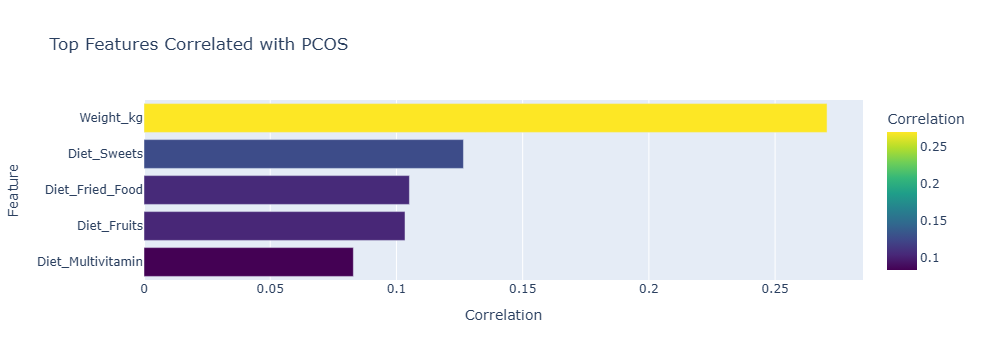

In [71]:
# Top 5 feautres which correlates with PCOS
top_corr = corr_matrix['PCOS'].drop('PCOS').abs().sort_values(ascending=False)[:5].reset_index()
top_corr.columns = ['Feature', 'Correlation']

fig = px.bar(top_corr, x='Correlation', y='Feature',
             orientation='h',
             title='Top Features Correlated with PCOS',
             color='Correlation',
             color_continuous_scale='viridis')
fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()